# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
print(df.head())

                                             reviews
0  ✅ Trip Verified |   This time British Airways ...
1  ✅ Trip Verified |   The seats were excellent, ...
2  ✅ Trip Verified |   After the nightmare of get...
3  ✅ Trip Verified |   Prior to boarding a gate a...
4  ✅ Trip Verified |   I flew from Amsterdam to L...


In [ ]:
df.to_csv("BA_reviews.csv")

<h1>Cleaning And Analysis

In [ ]:
import pandas as pd

# Load the scraped data
df = pd.read_csv("BA_reviews.csv")

# Remove "✅ Trip Verified |" from all reviews
df["reviews"] = df["reviews"].str.replace(r"✅ Trip Verified \|", "", regex=True).str.strip()

# Save the cleaned data
df.to_csv("BA_reviews_cleaned.csv", index=False)

print("✅ Cleaning complete! Data saved as BA_reviews_cleaned.csv.")

✅ Cleaning complete! Data saved as BA_reviews_cleaned.csv.


In [ ]:
data = pd.read_csv("BA_reviews_cleaned.csv")
print(data.head())

   Unnamed: 0                                            reviews
0           0  This time British Airways managed to get every...
1           1  The seats were excellent, with a feel of much ...
2           2  After the nightmare of getting through triple ...
3           3  Prior to boarding a gate agent seemed to pick ...
4           4  I flew from Amsterdam to Las Vegas with a layo...


In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["reviews"].apply(get_sentiment)

# Save with sentiment scores
df.to_csv("BA_reviews_with_sentiment.csv", index=False)

print(df.head())

   Unnamed: 0                                            reviews  sentiment
0           0  This time British Airways managed to get every...   0.370966
1           1  The seats were excellent, with a feel of much ...   0.357407
2           2  After the nightmare of getting through triple ...   0.051178
3           3  Prior to boarding a gate agent seemed to pick ...  -0.076786
4           4  I flew from Amsterdam to Las Vegas with a layo...   0.037584


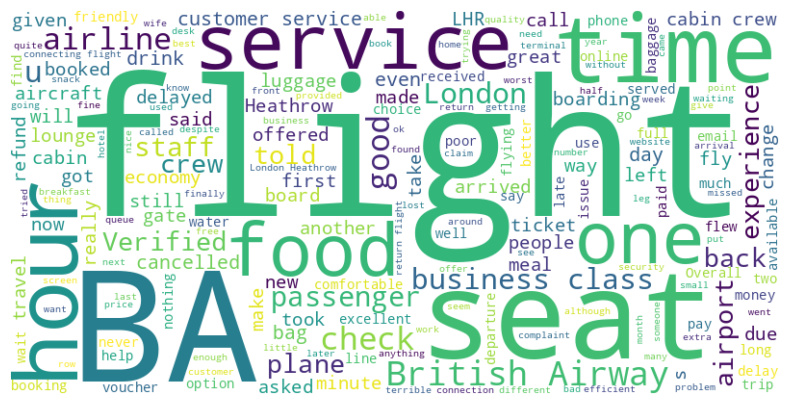

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud
text = " ".join(df["reviews"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2> LDA Topic Modeling

In [ ]:
!pip install gensim scikit-learn nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora

In [ ]:
# Download required nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv("/content/BA_reviews_cleaned.csv")

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return " ".join(words)

In [ ]:
import nltk
# Apply preprocessing to all reviews
df["cleaned_reviews"] = df["reviews"].apply(preprocess_text)

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df["cleaned_reviews"])

# Apply LDA
num_topics = 5  # Change this to the number of topics you want
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Display top words per topic
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-num_top_words:]]))

display_topics(lda_model, vectorizer.get_feature_names_out())


Topic 1:
economy staff flight customer airway british ba airline service seat

Topic 2:
british time service london customer told day hour ba flight

Topic 3:
meal service cabin time food seat good crew ba flight

Topic 4:
food service cabin economy airline flight business ba seat class

Topic 5:
asked ba hand service check luggage time plane staff flight


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example topic words from LDA output (Replace with your actual topics)
topics = {
    "Topic 1": "economy staff flight customer airway british ba airline service seat",
    "Topic 2": "british time service london customer told day hour ba flight",
    "Topic 3": "meal service cabin time food seat good crew ba flight",
    "Topic 4": "food service cabin economy airline flight business ba seat class",
    "Topic 5": "asked ba hand service check luggage time plane staff flight"
}

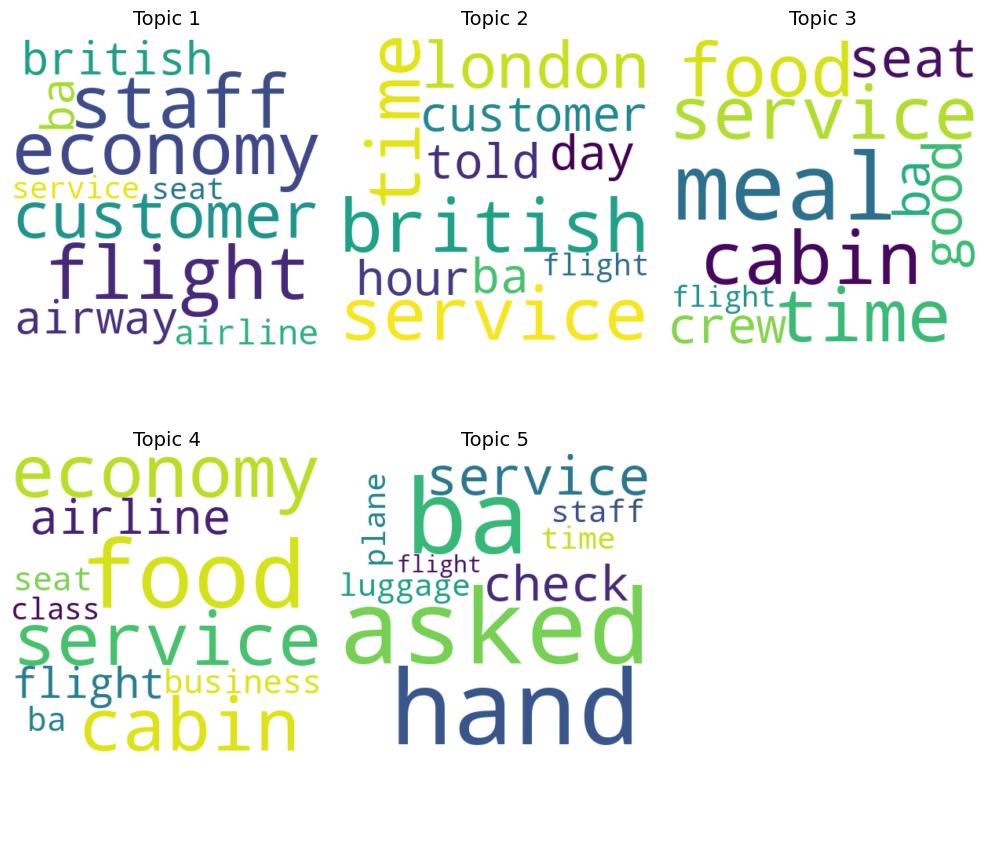

In [ ]:
# Set up 2x2 grid (+1 extra making it 3x2)
fig, axes = plt.subplots(2, 3, figsize=(10, 9))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate word clouds
for i, (topic, words) in enumerate(topics.items()):
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(words)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(topic, fontsize=14)

# Hide any extra empty subplot
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()